In [38]:
import pypsa, numpy as np
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
#import highspy

ImportError: DLL load failed while importing highs_bindings: The specified procedure could not be found.

Several Eastern Caribbean countries with only storage and no links, different numbers of months of hourly periods, with varying loads and generation from VRE 



In [2]:
csv_folder_name =  "Eastern_CaribbeanExtendableStorage_rjb-12mo_v2/"
network = pypsa.Network(csv_folder_name)
scenario = "Storage_12mo-highgeothermalcost-12hr/"

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network Eastern_CaribbeanExtendableStorage_rjb-12mo_v2 has buses, generators, loads, storage_units


In [3]:
#specify that we consider all snapshots
network.lopf(network.snapshots,solver_name="glpk",pyomo="True")

INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `kirchhoff` formulation
INFO:pypsa.opf:Solving model using glpk
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 418571311.042475
  Upper bound: 418571311.042475
  Number of objectives: 1
  Number of constraints: 1226401
  Number of variables: 657056
  Number of nonzeros: 2584634
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 62335.42580699921
# ----------------------------------------------------------
#   Solution Information
# 

(<SolverStatus.ok: 'ok'>, <TerminationCondition.optimal: 'optimal'>)

In [4]:
pypsa.Network.export_to_csv_folder(network,scenario)

INFO:pypsa.io:Exported network <unnamed> has generators, buses, storage_units, loads


<Axes: xlabel='snapshot'>

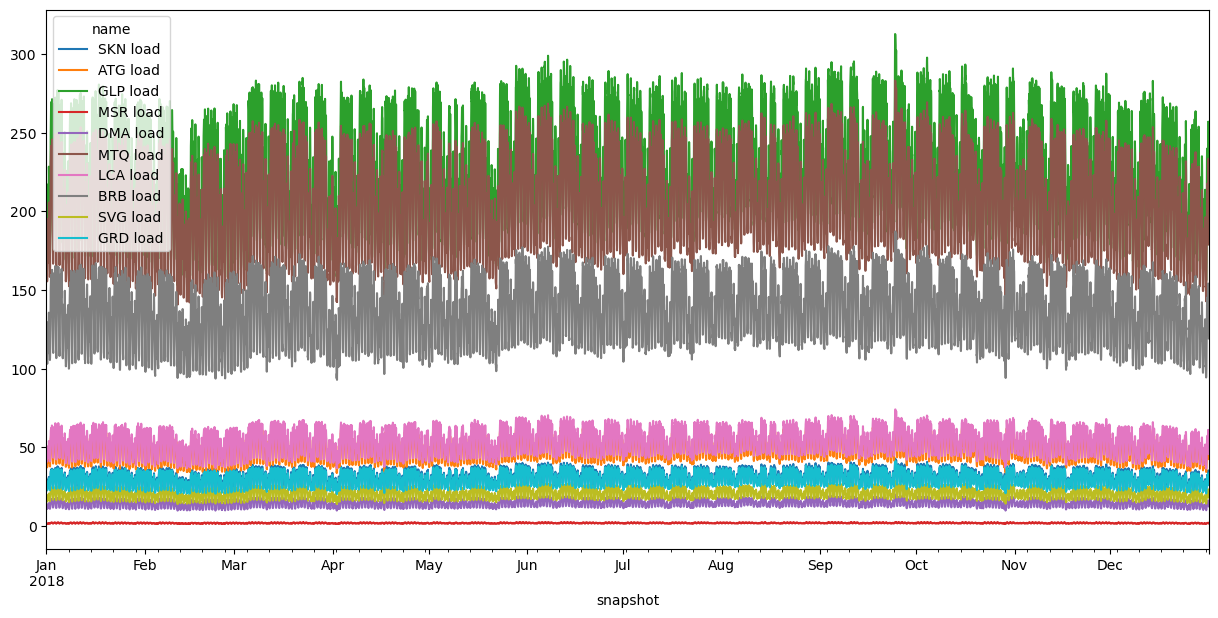

In [5]:
#print the load active power (P) consumption
network.loads_t.p.plot(figsize = (15,7))

name
SKN diesel         16.766944
SKN solar pv      101.226040
SKN wind           30.000000
SKN geothermal      0.000000
ATG diesel         24.213996
ATG wind           30.000000
ATG solar pv      187.847144
MSR diesel          0.817370
MSR geothermal      0.260144
MSR solar pv        8.595237
GLP diesel        105.462135
GLP coal            0.000000
GLP hydro          15.000000
GLP geothermal     14.700000
GLP wind          170.000000
GLP solar pv      598.659875
GLP biomass        10.000000
DMA diesel          4.844912
DMA hydro           8.000000
DMA wind           10.407660
DMA solar pv       11.656216
DMA geothermal      0.000000
MTQ diesel         84.116977
MTQ wind          120.000000
MTQ solar pv      564.518376
MTQ biomass        41.400000
MTQ geothermal      0.000000
LCA diesel         27.852799
LCA wind           66.000000
LCA solar pv      129.592419
LCA geothermal      0.000000
BRB diesel         73.286054
BRB solar pv      340.000000
BRB wind           46.000000
BRB bioma

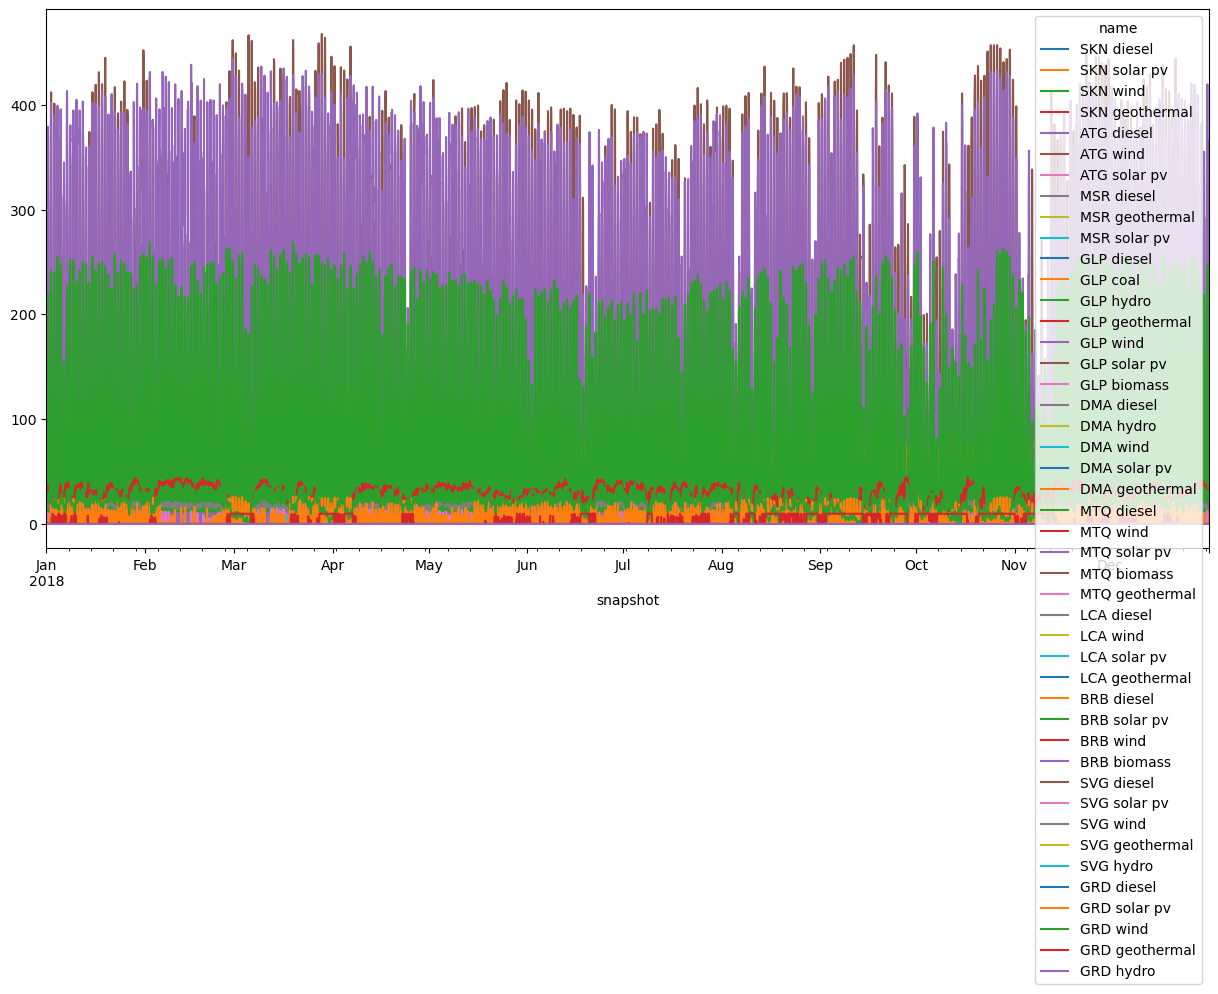

In [6]:
#print the generator active power (P) dispatch
network.generators_t.p.plot(figsize = (15,7))
network.generators.p_nom_opt

In [7]:
df_cap=pd.DataFrame(network.generators.p_nom_opt)
df_cap = df_cap.reset_index()

In [8]:
df_cap.columns = ['name','Capacity']
new = df_cap["name"].str.split(" ", n = 1, expand = True)
df_cap["Technology"]= new[1]
df_cap['Country']= new[0]
df_cap.drop(columns =["name"], inplace = True)
df_cap= df_cap.pivot(index = 'Country',columns = 'Technology', values = 'Capacity')
df_cap

Technology,biomass,coal,diesel,geothermal,hydro,solar pv,wind
Country,,,,,,,
ATG,NaN,NaN,24.213996,NaN,NaN,187.847144,30.000000
BRB,10.0,NaN,73.286054,NaN,NaN,340.000000,46.000000
DMA,NaN,NaN,4.844912,0.000000,8.0,11.656216,10.407660
GLP,10.0,0.0,105.462135,14.700000,15.0,598.659875,170.000000
GRD,NaN,NaN,8.881291,9.737352,0.0,33.315074,40.000000
LCA,NaN,NaN,27.852799,0.000000,NaN,129.592419,66.000000
MSR,NaN,NaN,0.817370,0.260144,NaN,8.595237,NaN
MTQ,41.4,NaN,84.116977,0.000000,NaN,564.518376,120.000000
SKN,NaN,NaN,16.766944,0.000000,NaN,101.226040,30.000000


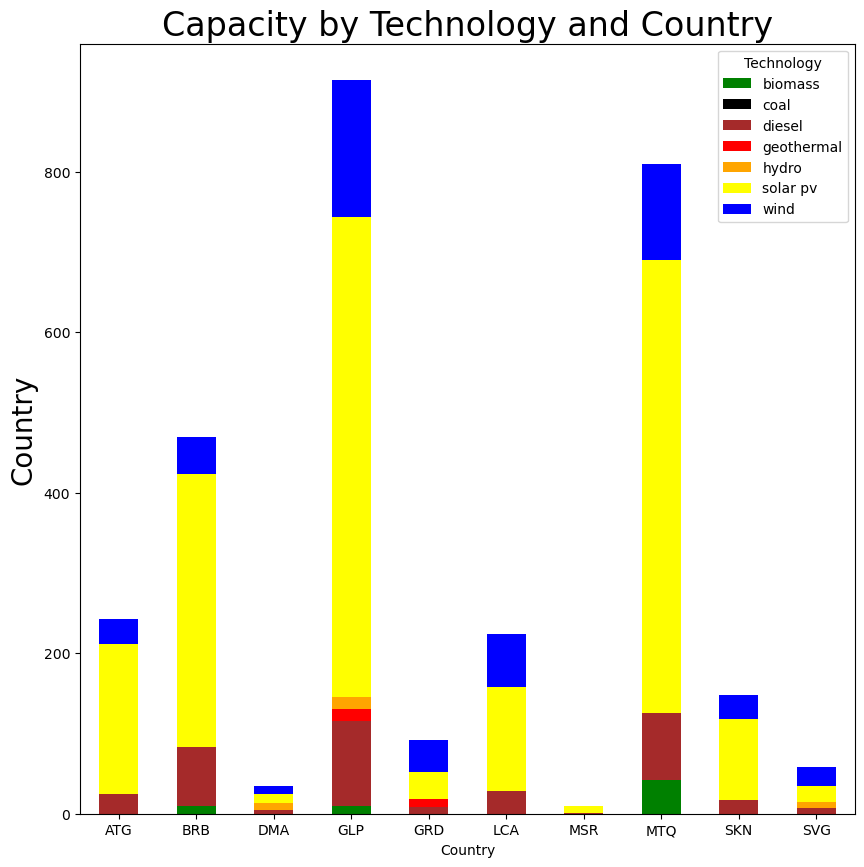

In [9]:
fig, axs = plt.subplots(figsize=(10, 10))        # Create an empty Matplotlib Figure and Axes
df_cap.plot(ax = axs,kind = 'bar', color=['green','black', 'brown', 'red', 'orange','yellow', 'blue'], rot=0,stacked = True)                  # Use pandas to put the area plot on the prepared Figure/Axes
axs.set_title("Capacity by Technology and Country",fontsize=24)
axs.set_ylabel("Capacity [MW]",fontsize=20)          # Do any Matplotlib customization you like
axs.set_ylabel("Country",fontsize=20) 
fig.savefig(scenario+"capacity.png", bbox_inches='tight')  

In [10]:
df_cap_scaled = df_cap.div(df_cap.sum(axis=1), axis=0)*100
df_cap_scaled

Technology,biomass,coal,diesel,geothermal,hydro,solar pv,wind
Country,,,,,,,
ATG,NaN,NaN,10.003256,NaN,NaN,77.603181,12.393563
BRB,2.130896,NaN,15.616499,NaN,NaN,72.450480,9.802124
DMA,NaN,NaN,13.878774,0.000000,22.916866,33.390492,29.813868
GLP,1.094305,0.0,11.540774,1.608628,1.641458,65.511650,18.603185
GRD,NaN,NaN,9.660537,10.591709,0.000000,36.238146,43.509608
LCA,NaN,NaN,12.465158,0.000000,NaN,57.997401,29.537441
MSR,NaN,NaN,8.450229,2.689449,NaN,88.860322,NaN
MTQ,5.110888,NaN,10.384359,0.000000,NaN,69.690585,14.814168
SKN,NaN,NaN,11.329553,0.000000,NaN,68.399216,20.271231


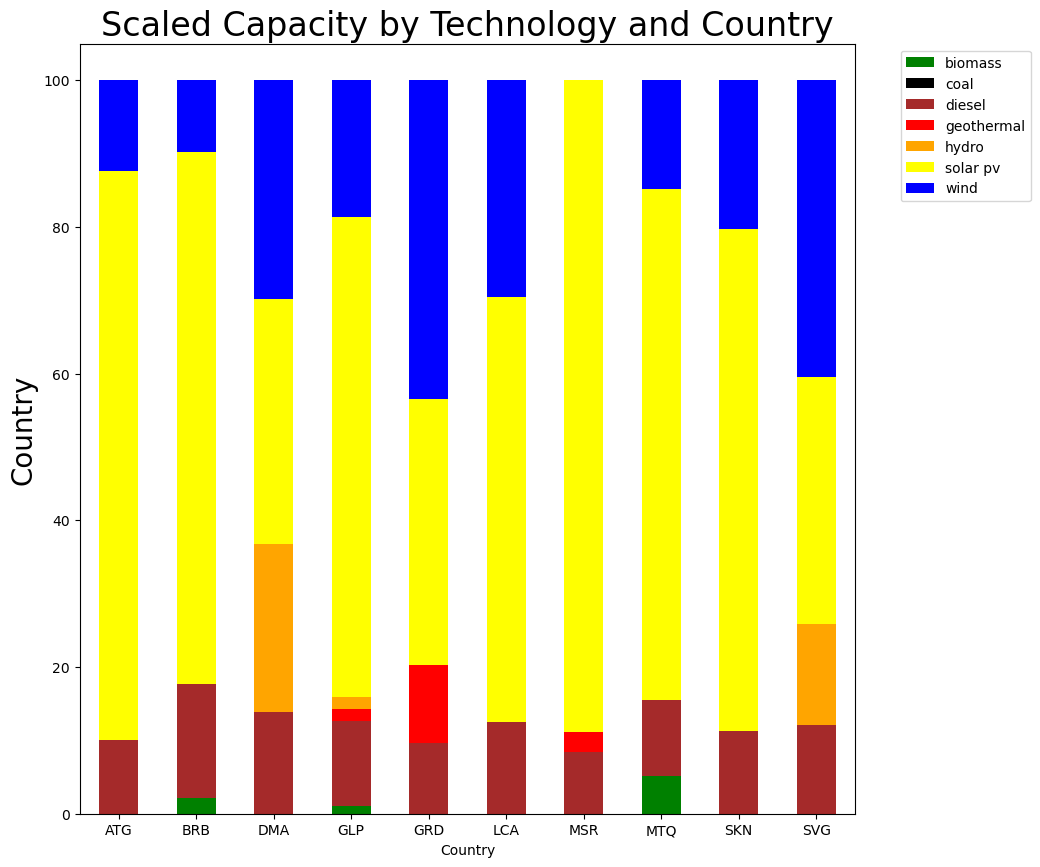

In [11]:
fig, axs = plt.subplots(figsize=(10, 10))        # Create an empty Matplotlib Figure and Axes
df_cap_scaled.plot(ax = axs,kind = 'bar', color=['green','black', 'brown', 'red', 'orange','yellow', 'blue'], rot=0,stacked = True)                  # Use pandas to put the area plot on the prepared Figure/Axes
axs.set_title("Scaled Capacity by Technology and Country",fontsize=24)
axs.set_ylabel("Scaled Capacity [%]",fontsize=20)          # Do any Matplotlib customization you like
axs.set_ylabel("Country",fontsize=20) 
axs.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.savefig(scenario+"scaled_capacity.png", bbox_inches='tight')

In [12]:
#network.storage_units.p_nom_opt
network.storage_units.p_nom_opt

name
SKN Storage     38.511794
ATG Storage     69.205789
MSR Storage      3.000000
GLP Storage    222.217273
DMA Storage      5.252810
MTQ Storage    209.144055
LCA Storage     45.052494
BRB Storage    130.050000
SVG Storage      9.210723
GRD Storage     16.701357
Name: p_nom_opt, dtype: float64

In [13]:
network.storage_units.capital_cost

name
SKN Storage    76942.0
ATG Storage    76942.0
MSR Storage    76942.0
GLP Storage    76942.0
DMA Storage    76942.0
MTQ Storage    76942.0
LCA Storage    76942.0
BRB Storage    76942.0
SVG Storage    76942.0
GRD Storage    76942.0
Name: capital_cost, dtype: float64

In [14]:
network.storage_units.p_nom_opt*network.storage_units.capital_cost

name
SKN Storage    2.963174e+06
ATG Storage    5.324832e+06
MSR Storage    2.308260e+05
GLP Storage    1.709784e+07
DMA Storage    4.041617e+05
MTQ Storage    1.609196e+07
LCA Storage    3.466429e+06
BRB Storage    1.000631e+07
SVG Storage    7.086914e+05
GRD Storage    1.285036e+06
dtype: float64

In [15]:
(network.generators.p_nom_opt*network.generators.capital_cost).sum()

322969520.4136133

In [16]:
(network.generators_t.p.sum()*network.generators.marginal_cost).sum()

89799482.68373099

In [17]:
(network.generators_t.p.sum()).sum()

6799810.61

In [18]:
network.generators_t.p.sum()

name
SKN diesel         13218.904410
SKN solar pv      138816.959021
SKN wind          121146.986569
SKN geothermal         0.000000
ATG diesel         22900.632010
ATG wind          114910.827007
ATG solar pv      299204.580983
MSR diesel           824.257326
MSR geothermal      2278.858178
MSR solar pv       13287.404496
GLP diesel         80440.545709
GLP coal               0.000000
GLP hydro          61996.706610
GLP geothermal     76452.931226
GLP wind          775893.979191
GLP solar pv      977345.710673
GLP biomass        31040.326591
DMA diesel          3002.814956
DMA hydro          52030.091688
DMA wind           51641.279012
DMA solar pv       20806.714344
DMA geothermal         0.000000
MTQ diesel         64124.773824
MTQ wind          573819.900677
MTQ solar pv      981510.203214
MTQ biomass       201618.422285
MTQ geothermal         0.000000
LCA diesel         21165.915889
LCA wind          318602.805404
LCA solar pv      133670.678707
LCA geothermal         0.000000
BRB

In [19]:
df_storage_cost = pd.DataFrame(network.storage_units.p_nom_opt*network.storage_units.capital_cost)
df_storage_cost.columns = ['storage_cost']
df_storage_cost = df_storage_cost.reset_index()
df_storage_cost

,name,storage_cost
0,SKN Storage,2.963174e+06
1,ATG Storage,5.324832e+06
2,MSR Storage,2.308260e+05
3,GLP Storage,1.709784e+07
4,DMA Storage,4.041617e+05
5,MTQ Storage,1.609196e+07
6,LCA Storage,3.466429e+06
7,BRB Storage,1.000631e+07
8,SVG Storage,7.086914e+05
9,GRD Storage,1.285036e+06


In [20]:
new = df_storage_cost["name"].str.split(" ", n = 1, expand = True)
df_storage_cost["Tech"]= new[1]
df_storage_cost['Country']= new[0]
df_storage_cost.drop(columns =["name"], inplace = True)
df_storage_cost= df_storage_cost.pivot(index = 'Country',columns = 'Tech', values = 'storage_cost')
df_storage_cost 

Tech,Storage
Country,
ATG,5.324832e+06
BRB,1.000631e+07
DMA,4.041617e+05
GLP,1.709784e+07
GRD,1.285036e+06
LCA,3.466429e+06
MSR,2.308260e+05
MTQ,1.609196e+07
SKN,2.963174e+06


In [21]:
df_cost=pd.DataFrame((network.generators.p_nom_opt*network.generators.capital_cost)+(network.generators_t.p.sum()*network.generators.marginal_cost))
df_cost.columns = ['generator_cost']
df_cost = df_cost.reset_index()
#df_cost

In [22]:
new1 = df_cost["name"].str.split(" ", n = 1, expand = True)
df_cost["Technology"]= new1[1]
df_cost['Country']= new1[0]
df_cost.drop(columns =["name"], inplace = True)
df_cost = df_cost.pivot(index = 'Country',columns = 'Technology', values = 'generator_cost')
#extracted_col = pd.DataFrame(df_storage_cost['storage_cost'])
#extracted_col
df_cost = df_cost.join(df_storage_cost['Storage'])
df_cost


,biomass,coal,diesel,geothermal,hydro,solar pv,wind,Storage
Country,,,,,,,,
ATG,NaN,NaN,8.493767e+06,NaN,NaN,1.423355e+07,3.488280e+06,5.324832e+06
BRB,4.091938e+06,NaN,6.351297e+07,NaN,NaN,2.576248e+07,5.348696e+06,1.000631e+07
DMA,NaN,NaN,1.431012e+06,0.000000e+00,1.359708e+06,8.832148e+05,1.210161e+06,4.041617e+05
GLP,3.717282e+06,0.0,3.371270e+07,1.097088e+07,2.497535e+06,4.536166e+07,1.976692e+07,1.709784e+07
GRD,NaN,NaN,3.116938e+06,5.071063e+06,0.000000e+00,2.524350e+06,4.651040e+06,1.285036e+06
LCA,NaN,NaN,8.890237e+06,0.000000e+00,NaN,9.819477e+06,7.674216e+06,3.466429e+06
MSR,NaN,NaN,2.954240e+05,1.925128e+05,NaN,6.673560e+05,NaN,2.308260e+05
MTQ,1.590133e+07,NaN,2.688344e+07,0.000000e+00,NaN,4.277469e+07,1.395312e+07,1.609196e+07
SKN,NaN,NaN,5.432933e+06,0.000000e+00,NaN,7.670099e+06,3.488280e+06,2.963174e+06


In [23]:
df_gen=pd.DataFrame(network.generators_t.p.sum()/1000)
df_gen = df_gen.reset_index()
df_gen.columns = ['name','Electricity']
new = df_gen["name"].str.split(" ", n = 1, expand = True)
df_gen["Technology"]= new[1]
df_gen['Country']= new[0]
df_gen.drop(columns =["name"], inplace = True)
df_gen= df_gen.pivot(index = 'Country',columns = 'Technology', values = 'Electricity')
df_gen

Technology,biomass,coal,diesel,geothermal,hydro,solar pv,wind
Country,,,,,,,
ATG,NaN,NaN,22.900632,NaN,NaN,299.204581,114.910827
BRB,84.562626,NaN,291.697776,NaN,NaN,597.516694,228.145004
DMA,NaN,NaN,3.002815,0.000000,52.030092,20.806714,51.641279
GLP,31.040327,0.0,80.440546,76.452931,61.996707,977.345711,775.893979
GRD,NaN,NaN,8.408782,26.714039,0.000000,41.816281,187.079598
LCA,NaN,NaN,21.165916,0.000000,NaN,133.670679,318.602805
MSR,NaN,NaN,0.824257,2.278858,NaN,13.287404,NaN
MTQ,201.618422,NaN,64.124774,0.000000,NaN,981.510203,573.819901
SKN,NaN,NaN,13.218904,0.000000,NaN,138.816959,121.146987


In [24]:
df_cost.sum(axis=1)/df_gen.sum(axis=1)/1000

Country
ATG    72.172253
BRB    90.457105
DMA    41.482742
GLP    66.457063
GRD    63.057756
LCA    63.050011
MSR    84.568322
MTQ    63.481538
SKN    71.580214
SVG    47.378686
dtype: float64

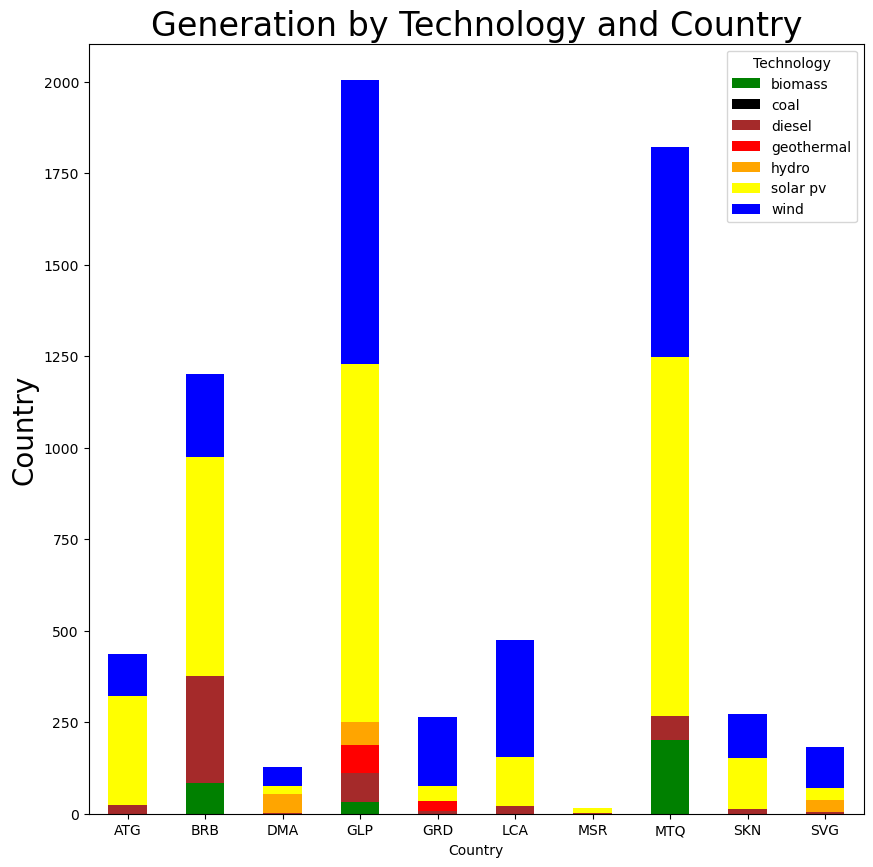

In [25]:
fig, axs = plt.subplots(figsize=(10, 10))        # Create an empty Matplotlib Figure and Axes
df_gen.plot(ax = axs,kind = 'bar', color=['green','black', 'brown', 'red', 'orange','yellow', 'blue'], rot=0,stacked = True)                  # Use pandas to put the area plot on the prepared Figure/Axes
axs.set_title("Generation by Technology and Country",fontsize=24)
axs.set_ylabel("Generation [GWh]",fontsize=20)          # Do any Matplotlib customization you like
axs.set_ylabel("Country",fontsize=20) 
fig.savefig(scenario+"generation.png", bbox_inches='tight') 

In [26]:
df_gen_scaled = df_gen.div(df_gen.sum(axis=1), axis=0)*100

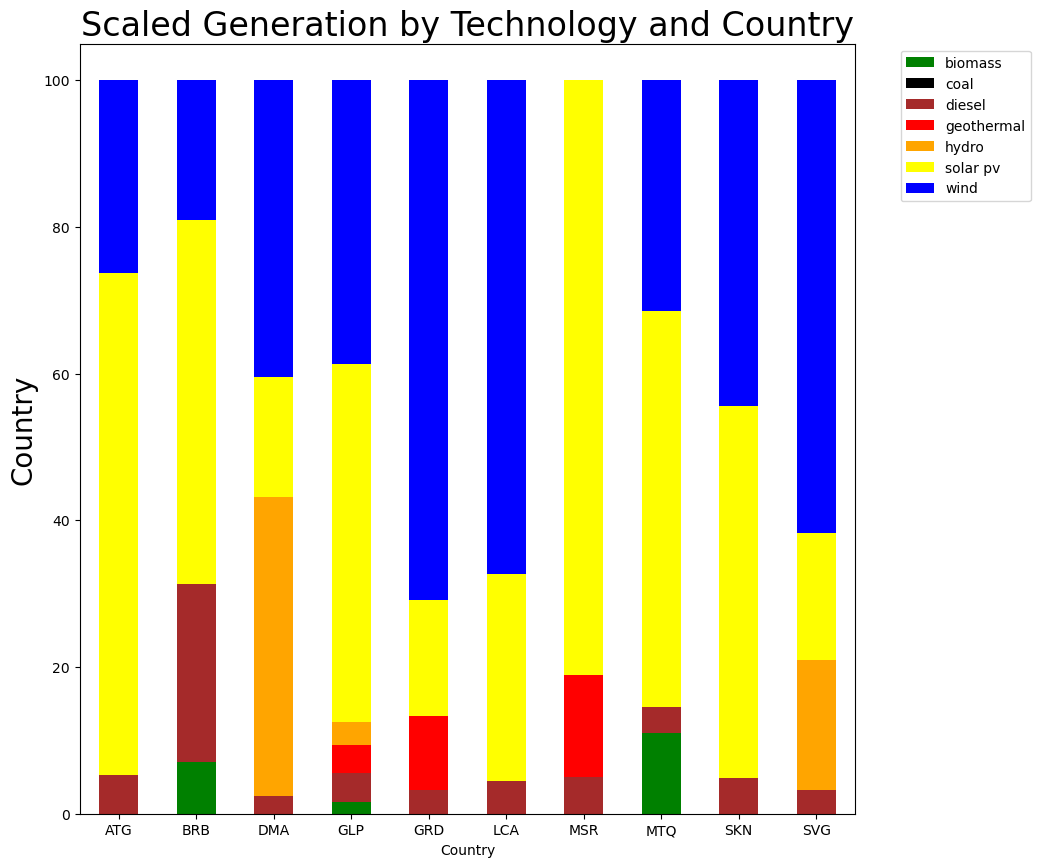

In [27]:
fig, axs = plt.subplots(figsize=(10, 10))        # Create an empty Matplotlib Figure and Axes
df_gen_scaled.plot(ax = axs,kind = 'bar', color=['green','black', 'brown', 'red', 'orange','yellow', 'blue'], rot=0,stacked = True)                  # Use pandas to put the area plot on the prepared Figure/Axes
axs.set_title("Scaled Generation by Technology and Country",fontsize=24)
axs.set_ylabel("Scaled Generation [%]",fontsize=20)          # Do any Matplotlib customization you like
axs.set_ylabel("Country",fontsize=20)  
axs.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.savefig(scenario+"scaled_generation.png", bbox_inches='tight') 

In [28]:
network.generators_t.p.sum()/(network.generators_t.p.sum()).sum()

name
SKN diesel        0.001944
SKN solar pv      0.020415
SKN wind          0.017816
SKN geothermal    0.000000
ATG diesel        0.003368
ATG wind          0.016899
ATG solar pv      0.044002
MSR diesel        0.000121
MSR geothermal    0.000335
MSR solar pv      0.001954
GLP diesel        0.011830
GLP coal          0.000000
GLP hydro         0.009117
GLP geothermal    0.011243
GLP wind          0.114105
GLP solar pv      0.143731
GLP biomass       0.004565
DMA diesel        0.000442
DMA hydro         0.007652
DMA wind          0.007595
DMA solar pv      0.003060
DMA geothermal    0.000000
MTQ diesel        0.009430
MTQ wind          0.084388
MTQ solar pv      0.144344
MTQ biomass       0.029651
MTQ geothermal    0.000000
LCA diesel        0.003113
LCA wind          0.046855
LCA solar pv      0.019658
LCA geothermal    0.000000
BRB diesel        0.042898
BRB solar pv      0.087873
BRB wind          0.033552
BRB biomass       0.012436
SVG diesel        0.000870
SVG solar pv      0.004

In [29]:
network.generators_t.p.sum()/(network.generators.p_nom_opt*8760)

name
SKN diesel        0.089999
SKN solar pv      0.156548
SKN wind          0.460985
SKN geothermal         NaN
ATG diesel        0.107963
ATG wind          0.437256
ATG solar pv      0.181827
MSR diesel        0.115117
MSR geothermal    1.000000
MSR solar pv      0.176473
GLP diesel        0.087071
GLP coal               NaN
GLP hydro         0.471817
GLP geothermal    0.593708
GLP wind          0.521014
GLP solar pv      0.186365
GLP biomass       0.354342
DMA diesel        0.070752
DMA hydro         0.742439
DMA wind          0.566422
DMA solar pv      0.203771
DMA geothermal         NaN
MTQ diesel        0.087024
MTQ wind          0.545871
MTQ solar pv      0.198478
MTQ biomass       0.555937
MTQ geothermal         NaN
LCA diesel        0.086749
LCA wind          0.551063
LCA solar pv      0.117748
LCA geothermal         NaN
BRB diesel        0.454368
BRB solar pv      0.200617
BRB wind          0.566173
BRB biomass       0.965327
SVG diesel        0.095314
SVG solar pv      0.182

In [30]:
((network.generators.p_nom_opt*network.generators.capital_cost).sum()+(network.generators_t.p.sum()*network.generators.marginal_cost).sum()+(network.storage_units.p_nom_opt*network.storage_units.capital_cost).sum()).sum()/(network.loads_t.p_set.sum()).sum()

69.17078882325451

In [31]:
((network.generators.p_nom_opt*network.generators.capital_cost).sum()+(network.generators_t.p.sum()*network.generators.marginal_cost).sum()+(network.storage_units.p_nom_opt*network.storage_units.capital_cost).sum())/network.loads_t.p_set.sum()

Load
SKN load     1721.734229
MSR load    28696.360075
ATG load     1076.272312
GLP load      234.801947
DMA load     3689.558700
MTQ load      258.280797
LCA load      993.470894
SVG load     2582.676504
GRD load     1781.496022
BRB load      391.330074
dtype: float64

In [32]:
#network.links.p_nom_opt

<Axes: xlabel='snapshot'>

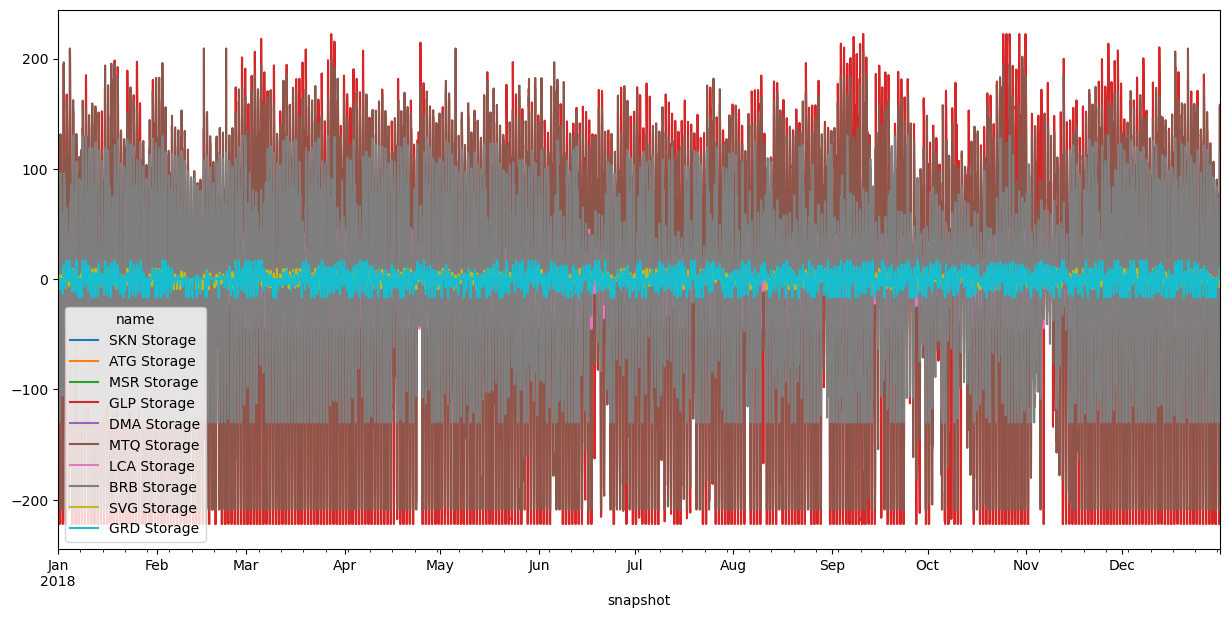

In [33]:
#print storage units
network.storage_units_t.p.plot(figsize = (15,7))
#network.stores_t.p.plot(figsize = (15,7))


<Axes: xlabel='snapshot'>

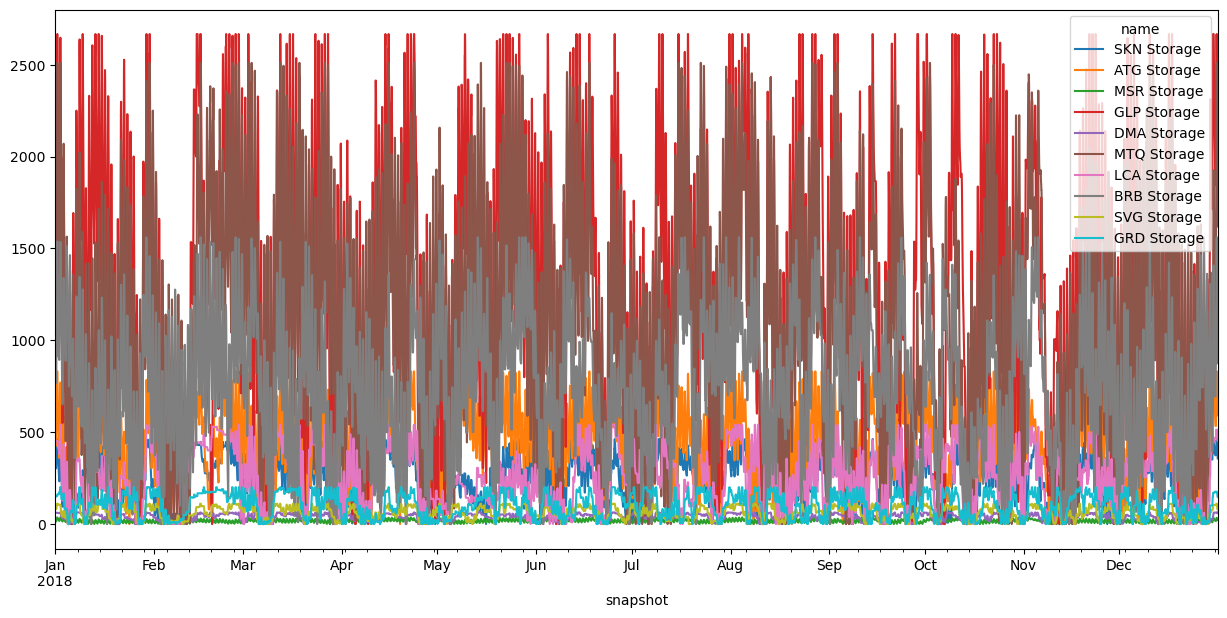

In [34]:
#print storage units state of charge
network.storage_units_t.state_of_charge.plot(figsize = (15,7))
#network.stores_t.e.plot(figsize = (15,7))


<Axes: xlabel='snapshot'>

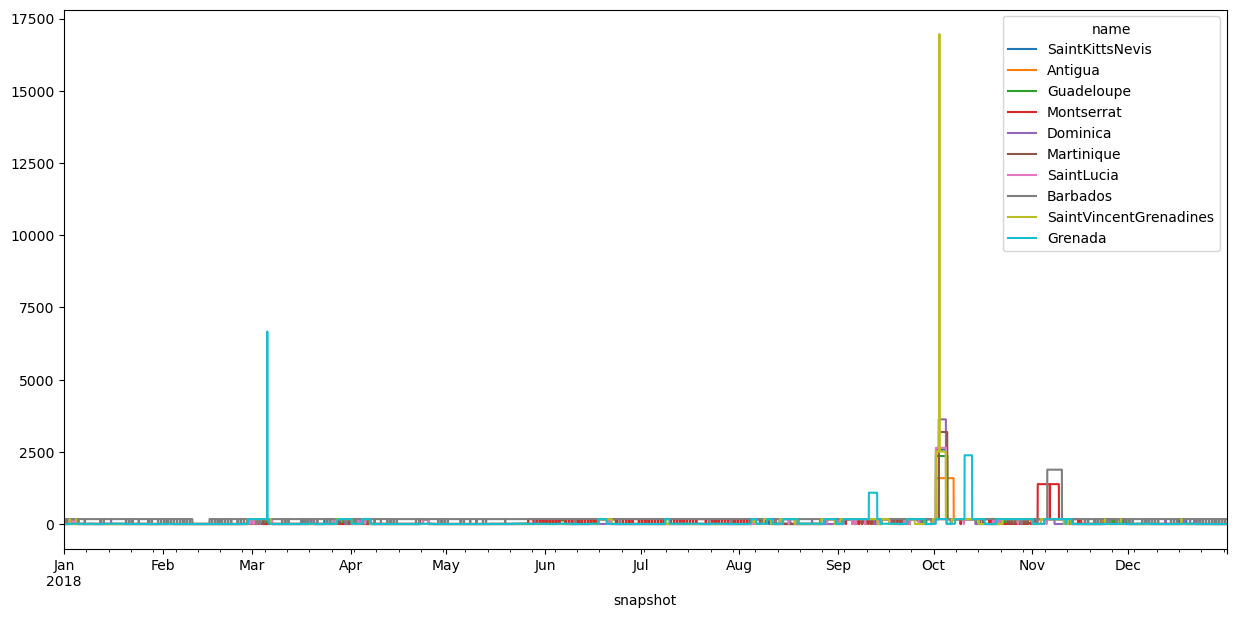

In [35]:
#print the clearing price 
network.buses_t.marginal_price.plot(figsize = (15,7))